# Training and Visualizing a Decision Tree

# Ejercicios
7. Train and fine-tune a Decision Tree for the moons dataset by following these steps:
    1. Use `make_moons(n_samples=10000, noise=0.4)` to generate a moons dataset.
    2. Use `train_test_split()` to split the dataset into a training set and a test set.
    3. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.
    4. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_moons(n_samples=10000,noise=0.4,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,
                                                 random_state=42)

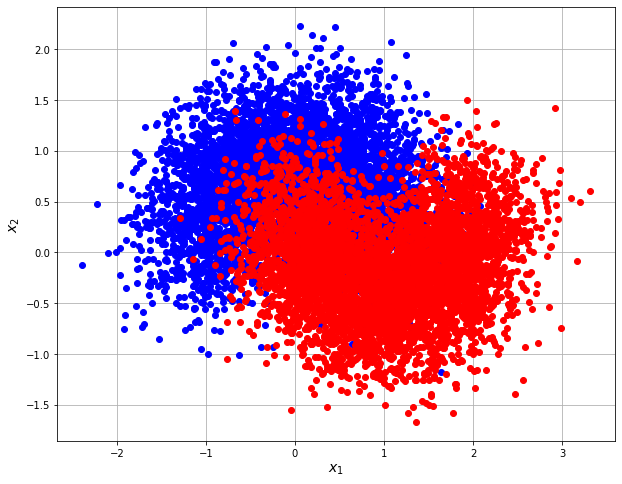

In [3]:
x1,x2 = X[y==0],X[y==1]
plt.figure(figsize=(10,8))
plt.plot(x1[:,0],x1[:,1],'bo')
plt.plot(x2[:,0],x2[:,1],'ro')
plt.xlabel('$x_1$',size=14);plt.ylabel('$x_2$',size=14)
plt.grid();plt.show()

In [4]:
param_grid = {'max_depth':[2,3,4,5],
             'min_samples_split':[10,15,20,25],
             'min_samples_leaf':[1,2,5,6],
             'max_leaf_nodes':[None,2,3,5,10]}

tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_clf,param_grid,cv=3,verbose=1,
                          scoring='accuracy')

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [None, 2, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 5, 6],
                         'min_samples_split': [10, 15, 20, 25]},
             scoring='accuracy', verbose=1)

In [5]:
print(grid_search.best_params_,grid_search.best_score_)

{'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 20} 0.8549333333333333


In [6]:
from sklearn.metrics import accuracy_score

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.8536


8. Grow a forest by following these steps:
    1. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use ScikitLearn’s `ShuffleSplit` class for this.
    2. Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision rees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.
    3. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s `mode()` function for this). This approach gives you majority-vote predictions over the test set.
    4. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [17]:
import random
from scipy.stats import mode

random.seed(42)
accuracy_test = []
predictions = []

for i in range(1000):
    subset = random.sample(range(len(X_train)),100)
    x_subset,y_subset = X_train[subset],y_train[subset]
    tree_clf = DecisionTreeClassifier(**grid_search.best_params_)
    tree_clf.fit(x_subset,y_subset)
    y_pred = tree_clf.predict(X_test)
    predictions.append(y_pred)
    accuracy_test.append(accuracy_score(y_test,y_pred))

print("Mean accuracy of all trees:",np.mean(accuracy_test))

predictions = np.array(predictions)

y_pred_mode = mode(predictions,axis=0).mode.reshape(-1)

print("Final accuracy score:",accuracy_score(y_test,y_pred_mode))

Mean accuracy of all trees: 0.8091263999999999
Final accuracy score: 0.8608
